In [1]:
# 1. Load the cars dataset.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv('autos_small.csv')
df.isna().sum()

price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   567
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64

In [4]:
df['gearbox'] = df['gearbox'].fillna(value = 'not-Provided')
df['fuelType'] = df['fuelType'].fillna(value = 'not-Provided')
df['model'] = df['model'].fillna(value = 'not-Provided')
df['vehicleType'] = df['vehicleType'].fillna(value = 'not-Provided')

In [5]:
df.isna().sum()

price                  0
name                   0
yearOfRegistration     0
monthOfRegistration    0
gearbox                0
powerPS                0
model                  0
kilometer              0
fuelType               0
brand                  0
vehicleType            0
dtype: int64

In [8]:
# 3. Complete any other preprocessing required.
# We will be removing records where price is less than 100,powerps is less than 10 and year of 
#registration is less than 2000 and greate than current year. We will also remove duplicate values
updated_df = df.drop_duplicates(['price', 'name', 'yearOfRegistration', 'monthOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'vehicleType'])

In [9]:
updated_df.info() #15 records removed as they were duplicates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                9985 non-null   int64 
 1   name                 9985 non-null   object
 2   yearOfRegistration   9985 non-null   int64 
 3   monthOfRegistration  9985 non-null   int64 
 4   gearbox              9985 non-null   object
 5   powerPS              9985 non-null   int64 
 6   model                9985 non-null   object
 7   kilometer            9985 non-null   int64 
 8   fuelType             9985 non-null   object
 9   brand                9985 non-null   object
 10  vehicleType          9985 non-null   object
dtypes: int64(5), object(6)
memory usage: 936.1+ KB


In [11]:
updated_df = updated_df.drop(updated_df[(updated_df.price<100)|(updated_df.powerPS<20)|(updated_df.yearOfRegistration<1990)|(updated_df.yearOfRegistration>2020)|
                                        (updated_df.powerPS>1600)|(updated_df.model == 'not-Provided')].index)
# df = df.drop(df[(df.score < 50) & (df.score > 20)].index)

In [14]:
updated_df.info() # 1873 more records were removed based on above step

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8112 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                8112 non-null   int64 
 1   name                 8112 non-null   object
 2   yearOfRegistration   8112 non-null   int64 
 3   monthOfRegistration  8112 non-null   int64 
 4   gearbox              8112 non-null   object
 5   powerPS              8112 non-null   int64 
 6   model                8112 non-null   object
 7   kilometer            8112 non-null   int64 
 8   fuelType             8112 non-null   object
 9   brand                8112 non-null   object
 10  vehicleType          8112 non-null   object
dtypes: int64(5), object(6)
memory usage: 760.5+ KB


In [15]:
updated_df['price'].describe()

count    8.112000e+03
mean     7.782208e+03
std      1.372354e+05
min      1.000000e+02
25%      1.498000e+03
50%      3.500000e+03
75%      8.000000e+03
max      1.234568e+07
Name: price, dtype: float64

In [16]:
updated_df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,not-Provided,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2222,BMW_318ti_compact,2001,10,manuell,143,3er,150000,benzin,bmw,limousine


In [17]:
#Get the age from year of registration and month of registration
updated_df['age'] = (2020-updated_df['yearOfRegistration']) + updated_df['monthOfRegistration']/12

In [18]:
updated_df = updated_df.drop(['monthOfRegistration','name','yearOfRegistration','brand'],axis = 1)

In [21]:
updated_df['age'].value_counts()

15.000000    84
22.000000    82
21.000000    81
20.000000    72
14.000000    63
             ..
27.166667     1
28.833333     1
1.000000      1
1.333333      1
30.750000     1
Name: age, Length: 350, dtype: int64

In [22]:
import seaborn as sns

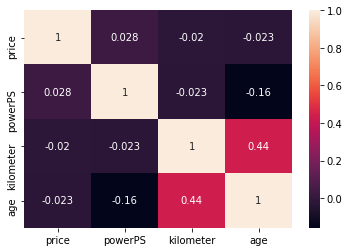

In [23]:
sns.heatmap(updated_df.corr(),annot = True)

In [24]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8112 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        8112 non-null   int64  
 1   gearbox      8112 non-null   object 
 2   powerPS      8112 non-null   int64  
 3   model        8112 non-null   object 
 4   kilometer    8112 non-null   int64  
 5   fuelType     8112 non-null   object 
 6   vehicleType  8112 non-null   object 
 7   age          8112 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 570.4+ KB


In [25]:
updated_df = updated_df.astype({'gearbox':'category','fuelType':'category','vehicleType':'category','model':'category'})


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
labelencoder = LabelEncoder()

In [28]:
updated_df['gearbox_Cat'] = labelencoder.fit_transform(updated_df['gearbox'])
updated_df['fuelType_Cat'] = labelencoder.fit_transform(updated_df['fuelType'])
updated_df['vehicleType_cat'] = labelencoder.fit_transform(updated_df['vehicleType'])
# updated_df['brand_cat'] = labelencoder.fit_transform(updated_df['brand'])
updated_df['model_cat'] = labelencoder.fit_transform(updated_df['model'])


In [31]:
updated_df = updated_df.drop(['gearbox','fuelType','model','vehicleType'],axis = 1)

In [32]:
updated_df.head()

,price,powerPS,kilometer,age,gearbox_Cat,fuelType_Cat,vehicleType_cat,model_cat
0,400,89,60000,28.666667,1,1,5,90
1,3500,150,125000,24.000000,1,6,2,9
2,2200,150,150000,22.000000,1,1,5,55
4,2600,41,150000,18.583333,0,3,2,98
5,2222,143,150000,19.833333,1,1,6,9


In [33]:
# 4. Apply various regression models and find out which model is the best for this dataset
from sklearn.linear_model import LinearRegression , Lasso , ridge_regression , ElasticNet , Ridge
# from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn import metrics

In [34]:
features = updated_df.drop(['price'],axis = 1)

In [35]:
features.values[0]

array([8.90000000e+01, 6.00000000e+04, 2.86666667e+01, 1.00000000e+00,
       1.00000000e+00, 5.00000000e+00, 9.00000000e+01])

In [36]:
target = updated_df['price']

In [37]:
target = np.log(target)

In [38]:
target.values

array([5.99146455, 8.16051825, 7.69621264, ..., 7.31322039, 6.87729607,
       8.98594604])

In [39]:
target.head(2)

0    5.991465
1    8.160518
Name: price, dtype: float64

In [40]:
X_train , X_test , Y_train , Y_test = train_test_split(features.values , target.values,random_state = 123,test_size=0.33)

In [41]:
Y_train

array([6.80239476, 9.33246951, 8.61250337, ..., 7.82003799, 7.77863015,
       9.29651807])

In [42]:
Y_test

array([7.09007684, 9.60911649, 5.85793315, ..., 7.90100705, 8.85352256,
       8.61250337])

# Linear Regression

In [43]:
model_LR = LinearRegression()# Ridge

In [44]:
model_LR.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
result_LR = model_LR.predict(X_test)

In [46]:
metrics.mean_absolute_error(Y_test , result_LR)

0.5357094953207729

In [47]:
metrics.r2_score(Y_test , result_LR)

0.6049134309077497

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
rfr.score(X_test, Y_test)

0.7829664416039481

# Lasso

In [52]:
model_L = Lasso(alpha= 0.3)

In [53]:
model_L.fit(X_train , Y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
result_lasso = model_L.predict(X_test)

In [55]:
metrics.mean_absolute_error(Y_test , result_lasso)

0.5571188118173463

In [56]:
metrics.r2_score(Y_test , result_lasso)

0.5790311897795024

# Ridge

In [57]:
model_R = Ridge(alpha= 0.3)
model_R.fit(X_train , Y_train)
result_ridge = model_R.predict(X_test)
metrics.mean_absolute_error(Y_test , result_ridge)
metrics.r2_score(Y_test , result_ridge)

0.6049128572767872

# ElastiNet

In [58]:
model_Elas = ElasticNet(alpha= 0.2 , l1_ratio= 0.4)
model_Elas.fit(X_train , Y_train)
result_elas = model_Elas.predict(X_test)
metrics.mean_absolute_error(Y_test , result_elas)
metrics.r2_score(Y_test , result_elas)

0.5953987920683483

# With all the models used, we found that random forest worked well for this dataset

In [59]:
# 5. Apply different Outlier detection methods and choose best approach to treat outliers 

#We already made quite pre-processing from removing extreme values,
minimizing no of clolumns which wouldnt be relavent and feature engineered from exisiting columns

In [76]:
# 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variables


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [75]:
calc_vif(features)

,variables,VIF
0,powerPS,4.359413
1,kilometer,14.229145
2,age,9.621458
3,gearbox_Cat,3.923292
4,fuelType_Cat,3.202648
5,vehicleType_cat,6.099897
6,model_cat,2.691151


# From the above we see that age,kilometer,vehicletype has high multi colinearity